In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

## Import Data

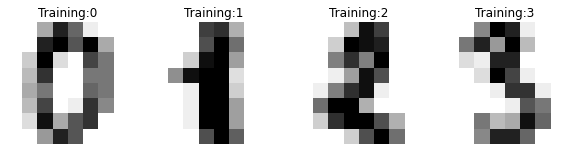

In [2]:
df=load_digits()

_, axes=plt.subplots(nrows=1,ncols=4,figsize=(10,5))
for ax,image,label in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title("Training:%i" % label)

# 
## Data Pre- processing

### Flatten Image

In [3]:
df.images.shape

(1797, 8, 8)

In [4]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
df.images[0].shape

(8, 8)

In [6]:
df.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [7]:
df.images[1].shape

(8, 8)

In [8]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [9]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [10]:
data[0].shape

(64,)

In [11]:
data.shape

(1797, 64)

## Scaling Data

In [12]:
data.min()

0.0

In [13]:
data.max()

16.0

In [14]:
data=data/16
data.min()

0.0

In [15]:
data.max()

1.0

In [16]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## Train Test Split Data


In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data,df.target,test_size=0.7)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((539, 64), (1258, 64), (539,), (1258,))

## Random Forest Model


In [19]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train,y_train)

RandomForestClassifier()

## Predict Test Data


In [20]:
y_pred=rf.predict(X_test)
y_pred

array([5, 8, 1, ..., 3, 7, 4])

## Model Accuracy


In [21]:
from sklearn.metrics import confusion_matrix,classification_report

In [22]:
confusion_matrix(y_test,y_pred)

array([[126,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [  0, 117,   0,   1,   0,   0,   0,   0,   0,   0],
       [  1,   3, 117,   3,   0,   0,   0,   0,   4,   1],
       [  0,   0,   1, 116,   0,   0,   0,   1,   2,   1],
       [  0,   1,   0,   0, 140,   0,   0,   0,   0,   1],
       [  0,   1,   0,   0,   1, 127,   1,   0,   0,   6],
       [  1,   0,   0,   0,   1,   0, 117,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 120,   0,   0],
       [  0,   7,   1,   0,   0,   1,   0,   1, 109,   1],
       [  0,   0,   0,   4,   0,   2,   0,   0,   2, 116]], dtype=int64)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       128
           1       0.91      0.99      0.95       118
           2       0.98      0.91      0.94       129
           3       0.94      0.96      0.95       121
           4       0.97      0.99      0.98       142
           5       0.98      0.93      0.95       136
           6       0.99      0.97      0.98       120
           7       0.98      1.00      0.99       120
           8       0.92      0.91      0.92       120
           9       0.92      0.94      0.93       124

    accuracy                           0.96      1258
   macro avg       0.96      0.96      0.96      1258
weighted avg       0.96      0.96      0.96      1258

